In [1]:
# a
import numpy as np
import scipy.stats as sts
import scipy.special as ssp
import scipy.integrate as intg
import scipy.optimize as opt

pts = np.loadtxt('clms.txt')
pts

array([ 361.65,  123.04,  541.77, ...,   97.43,  186.88,  119.19])

In [3]:
print ('mean=', np.mean(pts))
print ('median=', np.median(pts))
print ('maximum=', np.max(pts))
print ('minimum=', np.min(pts))
print ('standard deviation=', np.std(pts))
print ('variance=', np.var(pts))

mean= 720.277975327
median= 172.21
maximum= 227967.25
minimum= 0.01
standard deviation= 3972.66375639
variance= 15782057.3214


<IPython.core.display.Javascript object>


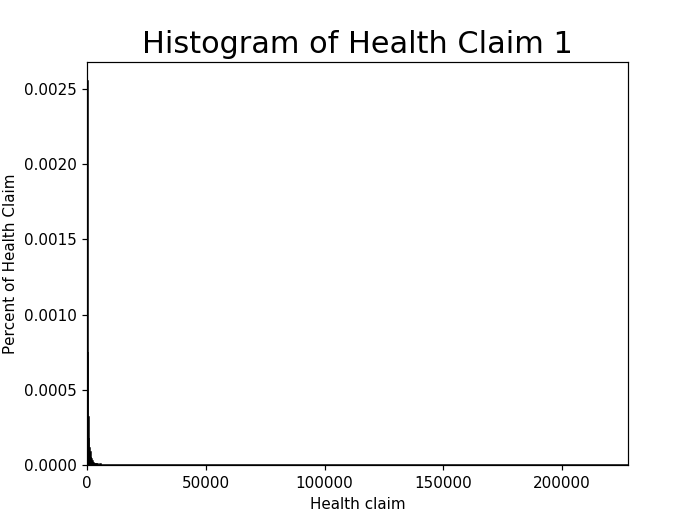

(0, 228000)

In [6]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook
count, bins, ignored = plt.hist(pts, 1000, edgecolor='black', normed=True)
plt.title('Histogram of Health Claim 1', fontsize=20)
plt.xlabel('Health claim')
plt.ylabel('Percent of Health Claim')
plt.xlim([0, 228000])

<IPython.core.display.Javascript object>


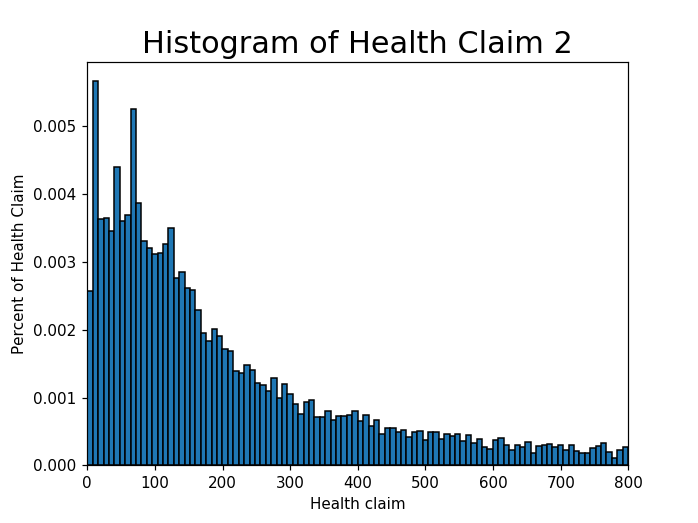

(0, 800)

In [7]:
ptst=pts[pts<=800]
weight=(1/ pts.shape[0])*np.ones_like(ptst)
count, bins, ignored = plt.hist(ptst, 100, weights = weight, edgecolor='black', normed=True)
plt.title('Histogram of Health Claim 2', fontsize=20)
plt.xlabel('Health claim')
plt.ylabel('Percent of Health Claim')
plt.xlim([0, 800])

The second histogram is preferred because it presents the majority of observations clearly.

In [8]:
# b
def gamma_pdf(xvals, alpha, beta):
    
    pdf_vals = xvals**(alpha-1)*(np.exp(-xvals/beta))/(ssp.gamma(alpha)*beta**alpha)
    
    return pdf_vals

In [9]:
def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [10]:
def crit(params, args):
    alpha, beta = params
    xvals= args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [11]:
beta_init = np.var(pts)/np.mean(pts)
alpha_init = np.mean(pts)/beta_init
params_init = np.array([alpha_init, beta_init])
params_bounds=((1e-10, None), (1e-10, None))
mle_args = (pts)
results = opt.minimize(crit, params_init, args = (mle_args), bounds = params_bounds, method = 'L-BFGS-B')
alpha_MLE, beta_MLE = results.x
log_like_mle = log_lik_gamma(pts, alpha_MLE, beta_MLE)
print('alpha_MLE=', alpha_MLE, ' beta_MLE=', beta_MLE, 'log_like_mle=',log_like_mle)

alpha_MLE= 0.221755309875  beta_MLE= 21911.0646993 log_like_mle= -82076.4516057


<IPython.core.display.Javascript object>


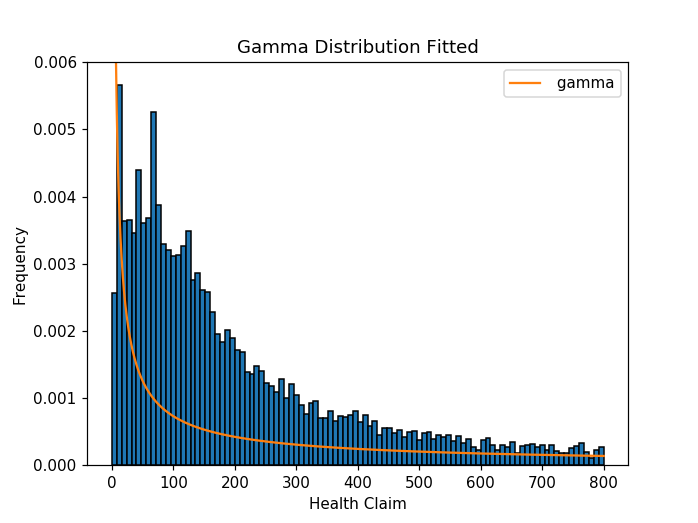

In [12]:
count, bins, ignored = plt.hist(ptst, 100, edgecolor='black', normed = True)
plt.xlabel('Health Claim')
plt.ylabel('Frequency')

dis_pts = np.linspace(1e-100, 800, 10000)
plt.plot(dis_pts, gamma_pdf(dis_pts, alpha_MLE, beta_MLE), label = ' gamma')
plt.ylim([0, 0.006])
plt.title('Gamma Distribution Fitted')
plt.legend(loc='upper right')


In [13]:
# c
def gg_pdf(xvals, alpha, beta, m):
    
    pdf_vals = m*xvals**(alpha-1)*(np.exp(-(xvals/beta)**m))/(ssp.gamma(alpha/m)*beta**alpha)
    
    return pdf_vals

In [14]:
def log_lik_gg(xvals, alpha, beta, m):
    pdf_vals = gg_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [15]:
def crit(params, args):
    alpha, beta, m = params
    xvals= args
    log_lik_val = log_lik_gg(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [17]:
beta_init = beta_MLE
alpha_init = alpha_MLE
m_init= 1
params_init = np.array([alpha_init, beta_init, m_init])
params_bounds=((1e-10, None), (1e-10, None),  (1e-10, None))
mle_args = (pts)
results = opt.minimize(crit, params_init, args = (mle_args), bounds = params_bounds, method = 'L-BFGS-B')
alpha_MLEg, beta_MLEg, m_MLEg = results.x
log_like_mleg = log_lik_gg(pts, alpha_MLEg, beta_MLEg, m_MLEg)
print('alpha_MLEg=', alpha_MLEg, ' beta_MLEg=', beta_MLEg, 'm_MLEg=', m_MLEg, 'log_like_mleg=',log_like_mleg)

alpha_MLEg= 0.221751913854  beta_MLEg= 21911.0644298 m_MLEg= 0.997019423793 log_like_mleg= -82076.4468421


<IPython.core.display.Javascript object>


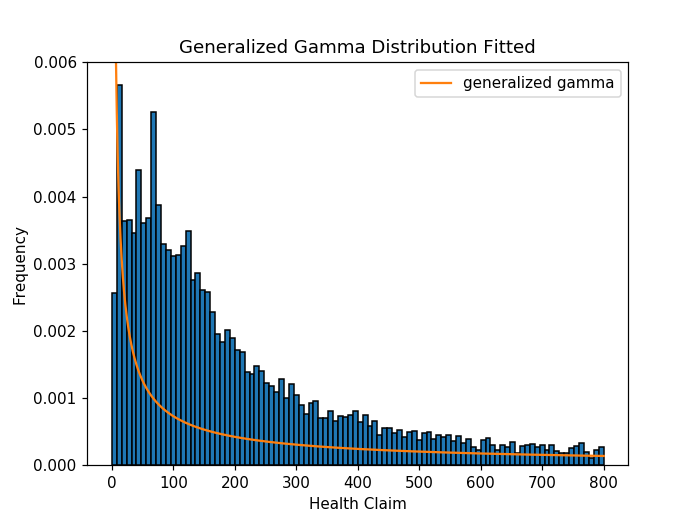

In [18]:
count, bins, ignored = plt.hist(ptst, 100, edgecolor='black', normed = True)
plt.xlabel('Health Claim')
plt.ylabel('Frequency')

dis_pts = np.linspace(1e-100, 800, 10000)
plt.plot(dis_pts, gg_pdf(dis_pts, alpha_MLEg, beta_MLEg, m_MLEg), label = 'generalized gamma')
plt.ylim([0, 0.006])
plt.title('Generalized Gamma Distribution Fitted')
plt.legend(loc='upper right')


In [19]:
# d
def gb_pdf(xvals, a, b, p, q):
    
    pdf_vals = a*xvals**(a*p-1)*(b**(-a*p))*((1+(xvals/b)**a)**(-p-q))/(ssp.beta(p, q))
    
    return pdf_vals

In [20]:
def log_lik_gb(xvals, a, b, p, q):
    pdf_vals = gb_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [21]:
def crit(params, args):
    a, b, p, q = params
    xvals= args
    log_lik_val = log_lik_gb(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [22]:
q_init = 10000
b_init = beta_MLEg* 10000**(1/m_MLEg)
a_init = m_MLEg   
p_init = alpha_MLEg/m_MLEg
params_init = np.array([a_init, b_init, p_init, q_init])
params_bounds=((1e-10, None), (1e-10, None),(1e-10, None), (1e-10, None))
mle_args = (pts)
results = opt.minimize(crit, params_init, args = (mle_args), bounds = params_bounds, method = 'L-BFGS-B')
a_gb, b_gb, p_gb, q_gb = results.x
log_like_gb = log_lik_gb(pts, a_gb, b_gb, p_gb, q_gb)
print('a_gb=', a_gb, ' b_gb=', b_gb, 'p_gb=', p_gb, 'log_like_gb=',log_like_gb)

a_gb= 0.699141680731  b_gb= 225227503.146 p_gb= 0.995788103513 log_like_gb= -76459.8059166


<IPython.core.display.Javascript object>


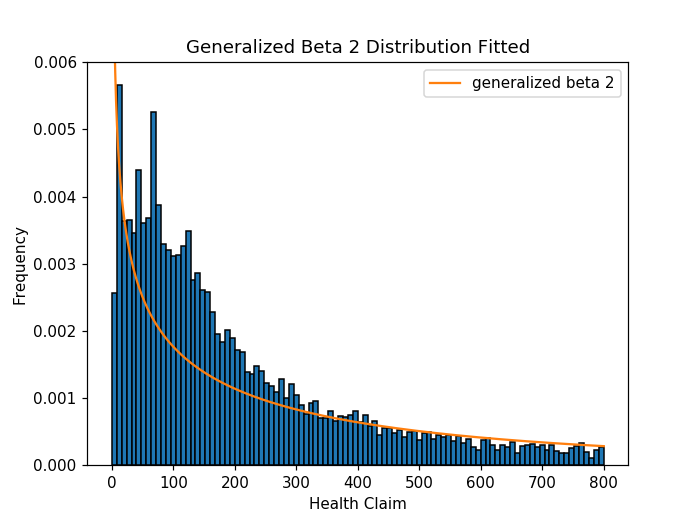

In [23]:
count, bins, ignored = plt.hist(ptst, 100, edgecolor='black', normed = True)
plt.xlabel('Health Claim')
plt.ylabel('Frequency')

dis_pts = np.linspace(1e-100, 800, 10000)
plt.plot(dis_pts, gb_pdf(dis_pts, a_gb, b_gb, p_gb, q_gb),label = 'generalized beta 2')
plt.ylim([0, 0.006])
plt.title('Generalized Beta 2 Distribution Fitted')
plt.legend(loc='upper right')

In [24]:
# e
# (b)
log_lik_b = log_lik_gamma(pts, alpha_MLE, beta_MLE)
log_lik_d = log_lik_gb(pts, a_gb, b_gb, p_gb, q_gb)
LR_val = 2 * (log_lik_b - log_lik_d)
pval_b = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value = ', pval_b, 'LR_val =', LR_val )

chi squared of H0 with 4 degrees of freedom p-value =  1.0 LR_val = -11233.2913781


In [25]:
# (c)
log_lik_c = log_lik_gg(pts, alpha_MLEg, beta_MLEg, m_MLEg)
log_lik_d = log_lik_gb(pts, a_gb, b_gb, p_gb, q_gb)
LR_val = 2 * (log_lik_c - log_lik_d)
pval_c = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value = ', pval_c, 'LR_val =', LR_val)

chi squared of H0 with 4 degrees of freedom p-value =  1.0 LR_val = -11233.2818511


In [26]:
# f
def d_fit(x):
    return gb_pdf(x,a_gb, b_gb, p_gb, q_gb)
pr_d = intg.quad(d_fit, 0, 1000)
prd = 1-(pr_d[0]-pr_d[1])

def b_fit(x):
    return gamma_pdf(x,alpha_MLE, beta_MLE)
pr_b = intg.quad(b_fit,0,1000)
prb = 1-(pr_b[0]-pr_b[1])
print('Pr(b)=', prb, 'Pr(d)=', prd)

Pr(b)= 0.45195972437185405 Pr(d)= 0.16256503531307864
